In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("processed_kelulusan.csv")
X = df.drop("Lulus", axis=1)
y = df["Lulus"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print(f"Jumlah Data Latih (Train): {X_train.shape[0]}")
print(f"Jumlah Data Uji (Test): {X_test.shape[0]}")

# Verifikasi distribusi kelas di data latih
print("\nDistribusi kelas di data Latih:")
print(y_train.value_counts(normalize=True))

# Verifikasi distribusi kelas di data uji
print("\nDistribusi kelas di data Uji:")
print(y_test.value_counts(normalize=True))

Jumlah Data Latih (Train): 8
Jumlah Data Uji (Test): 2

Distribusi kelas di data Latih:
Lulus
1    0.5
0    0.5
Name: proportion, dtype: float64

Distribusi kelas di data Uji:
Lulus
0    0.5
1    0.5
Name: proportion, dtype: float64


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # klasifikasi biner
])

model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy","AUC"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# 1. (BARU) Lakukan Scaling Data
# Buat scaler dan 'latih' scaler HANYA pada data latih
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Terapkan scaler yang SAMA ke data uji
X_test_scaled = scaler.transform(X_test)

print("Scaling data selesai.")

# 2. Siapkan Early Stopping (Kode Anda sudah benar)
es = keras.callbacks.EarlyStopping(
    monitor="val_loss",  # Monitor loss pada data validasi
    patience=10,         # Berhenti jika tidak membaik selama 10 epoch
    restore_best_weights=True # Kembalikan bobot model ke epoch terbaik
)

print("Mulai melatih model ANN...")

# 3. Latih Model (ANN)
#    Gunakan X_train_scaled dan validation_data=(X_test_scaled, y_test)
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test), # <-- PENYESUAIAN
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

print("Pelatihan selesai.")

Scaling data selesai.
Mulai melatih model ANN...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - AUC: 0.5625 - accuracy: 0.5000 - loss: 0.7464 - val_AUC: 0.5000 - val_accuracy: 0.5000 - val_loss: 0.7316
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - AUC: 0.7188 - accuracy: 0.5000 - loss: 0.7319 - val_AUC: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.7202
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - AUC: 0.8125 - accuracy: 0.5000 - loss: 0.6413 - val_AUC: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.7100
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - AUC: 0.6875 - accuracy: 0.5000 - loss: 0.6968 - val_AUC: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6999
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - AUC: 0.7500 - accuracy: 0.5000 - loss: 0.6479 - val_AUC: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6900
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - AUC: 0.5000 - accuracy: 0.5000 - loss: 0.7116 - val_AUC: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6804


In [4]:
from sklearn.metrics import classification_report, confusion_matrix

# --- PENYESUAIAN DI SINI ---
# Gunakan X_test_scaled, bukan X_test
loss, acc, auc = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Acc:", acc, "AUC:", auc)

# --- PENYESUAIAN DI SINI ---
# Gunakan X_test_scaled, bukan X_test
y_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_proba >= 0.5).astype(int)

# Kode ini sudah benar
print("\nConfusion Matrix (test):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (test):")
print(classification_report(y_test, y_pred, digits=3))

Test Acc: 1.0 AUC: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step

Confusion Matrix (test):
[[1 0]
 [0 1]]

Classification Report (test):
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         1
           1      1.000     1.000     1.000         1

    accuracy                          1.000         2
   macro avg      1.000     1.000     1.000         2
weighted avg      1.000     1.000     1.000         2



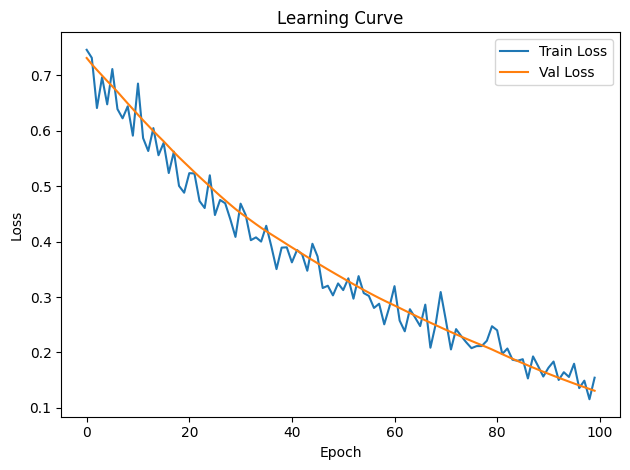

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.title("Learning Curve")
plt.tight_layout(); plt.savefig("learning_curve.png", dpi=120)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import pandas as pd

# Pastikan variabel data ini sudah ada dari langkah sebelumnya!
# X_train_scaled, y_train, X_test_scaled, y_test

def run_ann_experiment(
    neurons_l1=32, 
    optimizer_name='adam', 
    dropout_rate=0.3,
    use_batch_norm=False,
    use_l2_reg=False
):
    """
    Fungsi untuk membangun, melatih, dan mengevaluasi model ANN
    berdasarkan parameter eksperimen.
    """
    
    # Buat label deskriptif untuk output
    exp_name = (
        f"Neurons: {neurons_l1}, Opt: {optimizer_name}, "
        f"Dropout: {dropout_rate}, BN: {use_batch_norm}, L2: {use_l2_reg}"
    )
    print(f"--- Menjalankan Eksperimen: {exp_name} ---")
    
    # Tentukan L2 regularizer jika digunakan
    kernel_reg = l2(0.001) if use_l2_reg else None

    # 1. Bangun Model
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    
    # Layer 1
    model.add(layers.Dense(neurons_l1, activation="relu", kernel_regularizer=kernel_reg))
    if use_batch_norm:
        model.add(layers.BatchNormalization()) # <-- Eksperimen Regulasi
    model.add(layers.Dropout(dropout_rate)) # <-- Eksperimen Regulasi
    
    # Layer 2 (tetap)
    model.add(layers.Dense(16, activation="relu", kernel_regularizer=kernel_reg))
    
    # Output Layer
    model.add(layers.Dense(1, activation="sigmoid"))
    
    # 2. Siapkan Optimizer
    if optimizer_name == 'adam':
        opt = keras.optimizers.Adam(1e-3)
    elif optimizer_name == 'sgd':
        opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9) # <-- Eksperimen Optimizer
    else:
        raise ValueError("Optimizer tidak dikenal")

    # 3. Compile
    model.compile(optimizer=opt,
                  loss="binary_crossentropy",
                  metrics=["accuracy", "AUC"]) # <-- Sudah termasuk AUC & Akurasi
    
    # 4. Callbacks
    es = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    )
    
    # 5. Latih
    model.fit(
        X_train_scaled, y_train,
        validation_data=(X_test_scaled, y_test),
        epochs=100, batch_size=32,
        callbacks=[es], 
        verbose=0 # 0=Silent, agar output tidak banjir
    )
    
    # 6. Evaluasi & Prediksi
    loss, acc, auc = model.evaluate(X_test_scaled, y_test, verbose=0)
    y_proba = model.predict(X_test_scaled, verbose=0).ravel()
    y_pred = (y_proba >= 0.5).astype(int)
    
    # Dapatkan F1-score (kita pakai 'macro' karena data imbalanced)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0) # <-- Termasuk F1
    
    print(f"Hasil: Akurasi={acc:.4f}, AUC={auc:.4f}, F1-Macro={f1:.4f}")
    print("-" * 70)
    
    # Kembalikan hasil sebagai dictionary
    return {
        "Config": exp_name,
        "Accuracy": acc,
        "AUC": auc,
        "F1_Macro": f1
    }

In [7]:
# List untuk menyimpan semua hasil
all_results = []

# --- Jalankan Rangkaian Eksperimen ---

# Model dasar kita (dari langkah 2-3)
all_results.append(run_ann_experiment(
    neurons_l1=32, optimizer_name='adam', dropout_rate=0.3
))

# 1. Eksperimen Neuron (Ubah jumlah neuron)
all_results.append(run_ann_experiment(
    neurons_l1=64, optimizer_name='adam', dropout_rate=0.3
))
all_results.append(run_ann_experiment(
    neurons_l1=128, optimizer_name='adam', dropout_rate=0.3
))

# 2. Eksperimen Optimizer (Ubah ke SGD+Momentum)
all_results.append(run_ann_experiment(
    neurons_l1=32, optimizer_name='sgd', dropout_rate=0.3
))

# 3. Eksperimen Regulasi
# 3a. Dropout lebih besar
all_results.append(run_ann_experiment(
    neurons_l1=32, optimizer_name='adam', dropout_rate=0.5
))
# 3b. Tambah L2 Regularization
all_results.append(run_ann_experiment(
    neurons_l1=32, optimizer_name='adam', dropout_rate=0.3, use_l2_reg=True
))
# 3c. Tambah Batch Normalization
all_results.append(run_ann_experiment(
    neurons_l1=32, optimizer_name='adam', dropout_rate=0.3, use_batch_norm=True
))

# --- Tampilkan Hasil Akhir ---
print("\n=== HASIL AKHIR SEMUA EKSPERIMEN ===")
results_df = pd.DataFrame(all_results)

# Menampilkan tabel hasil dengan format yang rapi
print(results_df.to_markdown(index=False, floatfmt=".4f"))

--- Menjalankan Eksperimen: Neurons: 32, Opt: adam, Dropout: 0.3, BN: False, L2: False ---
Hasil: Akurasi=1.0000, AUC=1.0000, F1-Macro=1.0000
----------------------------------------------------------------------
--- Menjalankan Eksperimen: Neurons: 64, Opt: adam, Dropout: 0.3, BN: False, L2: False ---
Hasil: Akurasi=1.0000, AUC=1.0000, F1-Macro=1.0000
----------------------------------------------------------------------
--- Menjalankan Eksperimen: Neurons: 128, Opt: adam, Dropout: 0.3, BN: False, L2: False ---
Hasil: Akurasi=1.0000, AUC=1.0000, F1-Macro=1.0000
----------------------------------------------------------------------
--- Menjalankan Eksperimen: Neurons: 32, Opt: sgd, Dropout: 0.3, BN: False, L2: False ---
Hasil: Akurasi=1.0000, AUC=1.0000, F1-Macro=1.0000
----------------------------------------------------------------------
--- Menjalankan Eksperimen: Neurons: 32, Opt: adam, Dropout: 0.5, BN: False, L2: False ---
Hasil: Akurasi=1.0000, AUC=1.0000, F1-Macro=1.0000
------